In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras import layers
import tensorflow as tf
from keras.preprocessing.image import img_to_array
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
filename = []
for dirname,_,filenames in os.walk('./archive'):
    for filename in filenames:
        print(os.path.join(dirname,filename))
#https://www.kaggle.com/code/kiranpathro/face-mask-detection-using-cnn

./archive\test\0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.3135dfc5feab288d76a4ccfd22dfc5bf.jpg
./archive\test\1224331650_g_400-w_g_jpg.rf.b816f49e2d84044fc997a8cbd55c347d.jpg
./archive\test\126202-untitled-design-13_jpg.rf.56b50d413464989bb2232448a8fbb915.jpg
./archive\test\1288126-10255706714jpg_jpg.rf.95f7324cbfd48e0386e0660b5e932223.jpg
./archive\test\15391513324714o1n0r10n6_jpg.rf.a91fbc7be8a94ed3c48d2e4b35bd53bb.jpg
./archive\test\15391513329330sooq10859_jpg.rf.89c8524c2096175fa2c728e5d73f1c28.jpg
./archive\test\1579924271_jpg.rf.be5b27c2b2801bccc191e6dbd9bfccca.jpg
./archive\test\phplpE73q_jpg.rf.bd81cab9f8ff2674ce2e58278f7d37fa.jpg
./archive\test\r1p00017o8171pnq407_jpg.rf.6fd25b7219a249e97f54fcabf2b52726.jpg
./archive\test\RTX7CCFN_jpg.rf.66ed5c5054f30d933d19ab3d56ace004.jpg
./archive\test\shutterstock_1627199179_jpg.rf.8432d033a37b3d142ec4ffcede508c7d.jpg
./archive\test\the-first-day-of-wuhan-s-closure-some-people-fled-some-panicked_jpg.rf.0302fefb0879eb37736a704ca5d07

In [7]:
"""def data_set(dir_data):
    data = []
    target = []
    data_map = {'with_mask':1,'without_mask':0}
    skipped=0
    root = dir_data+"_annotations.csv"
    df1 = pd.read_csv(root)
    df1.dataframeName = "_annotations.csv"
    nnRow,nCol = df1.shape
    for i in  range(len(df1)):
        without_mask = 'without_mask'
        k = dir_data+df1['filename'][i]
        image = cv2.imread(k)
        xmin = int(df1['xmin'][i])
        ymin =  int(df1['ymin'][i])
        xmax =  int(df1['xmax'][i])
        ymax= int(df1['ymax'][i])
        image = image[ymin:ymax,xmin:xmax]
        try :
            image = cv2.resize(image,(70,70))
        except Exception as E:
            skipped +=1
            
            print(E)
            continue
        if (df1['class'][i]=='mask'):
            without_mask ='with_mask'
        image = img_to_array(image)
        data.append(image)
        target.append(data_map[without_mask])
    data=np.array(data,dtype='float')/255.0
    traget = tf.keras.utils.to_categorical(np.array(target),num_classes=2)
    return data,target"""
def data_set(dir_data):
    data=[]
    target=[]
    data_map = {
    'with_mask':1,
    'without_mask':0
    }
    skipped=0
    root=dir_data+'_annotations.csv'
    df1 = pd.read_csv(root)
    df1.dataframeName = '_annotations.csv'
    nRow, nCol = df1.shape
    for i in range(len(df1)):
        without_mask='without_mask'
        k=dir_data+df1['filename'][i]
        image=cv2.imread(k)
        xmin=int(df1['xmin'][i])
        ymin=int(df1['ymin'][i])
        xmax=int(df1['xmax'][i])
        ymax=int(df1['ymax'][i])
        image=image[ymin:ymax,  xmin:xmax]
        try:
                # resizing to (70 x 70)
                image = cv2.resize(image,(70,70))
        except Exception as E:
                skipped += 1
                print(E)
                continue
        if(df1['class'][i]=='mask'):
            without_mask='with_mask'
        image=img_to_array(image)
        data.append(image)
        target.append(data_map[without_mask])
    data = np.array(data, dtype="float") / 255.0
    target = tf.keras.utils.to_categorical(np.array(target), num_classes=2)
    return data, target
train_dir='./archive/train/'
test_dir = './archive/test/'
val_dir = './archive/valid/'
training_data,training_target = data_set(train_dir)
testing_data,test_target = data_set(test_dir)
val_data,val_target = data_set(val_dir)

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



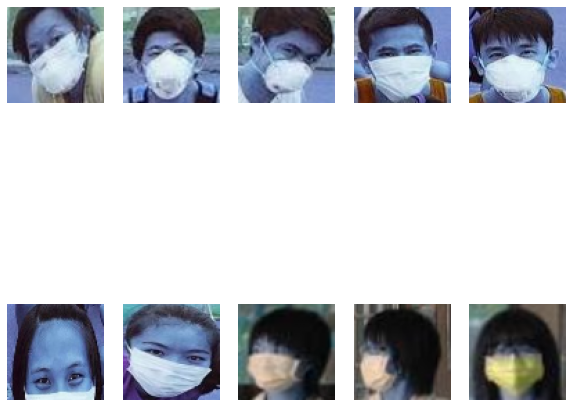

In [25]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(training_data[i])
plt.show()

In [26]:
"""img_shape = training_data[0].shape
depth,height,width = 3,img_shape[0],img_shape[1]
img_shape = (height,width,depth)
chanDim = -1
if backend.image_data_format() == 'channels_first':
    #Returns a string, either 'channels_first' or 'channels_last'
    img_shape = (depth,height,width)
    chanDim=1"""
img_shape=training_data[0].shape
depth, height, width=3, img_shape[0], img_shape[1]
img_shape=(height, width, depth)
chanDim=-1
if backend.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        img_shape = (depth, height, width)
        chanDim = 1

# Model


In [27]:
"""model=Sequential([
    layers.Conv2D(32,(3,3),input_shape=img_shape),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(64,(3,3)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(128,(3,3)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(256,(3,3)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.4),
    
    layers.Dense(2,activation='softmax')
    
])
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'])"""
model=Sequential()
model.add(layers.Conv2D(32,(3,3),input_shape=img_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(2,activation='softmax'))

adam =tf.keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 68, 68, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 128)      

In [29]:
"""aug = ImageDataGenerator(rotation_range=25,#旋转范围
                         width_shift_range=0.1,#水平平移范围
                         height_shift_range=0.1,
                         shear_range=0.1,#透视变换的范围
                         zoom_range=0.1,
                         horizontal_flip=True,#水平反转
                         fill_mode='nearest')#填充模式, constant, nearest, reflect"""
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [30]:
#training_target = np.array(training_target,np.float32)
"""history = model.fit(
    aug.flow(training_data,training_target,batch_size=10),
    epochs=70,
    validation_data=(val_data,val_target),
    verbose=2,
    shuffle=True)"""
history = model.fit(aug.flow(training_data, training_target, batch_size=10),
                   epochs=70,
                   validation_data=(val_data, val_target),
                   verbose=2,
                   shuffle=True) 

Epoch 1/70
70/70 - 3s - loss: 0.3771 - accuracy: 0.8158 - val_loss: 0.2008 - val_accuracy: 0.8889
Epoch 2/70
70/70 - 2s - loss: 0.2947 - accuracy: 0.8432 - val_loss: 0.1952 - val_accuracy: 0.9012
Epoch 3/70
70/70 - 2s - loss: 0.2575 - accuracy: 0.8777 - val_loss: 0.2011 - val_accuracy: 0.9383
Epoch 4/70
70/70 - 2s - loss: 0.2711 - accuracy: 0.8590 - val_loss: 0.1687 - val_accuracy: 0.9074
Epoch 5/70
70/70 - 4s - loss: 0.2416 - accuracy: 0.8806 - val_loss: 0.1572 - val_accuracy: 0.9074
Epoch 6/70
70/70 - 4s - loss: 0.2378 - accuracy: 0.9022 - val_loss: 0.1778 - val_accuracy: 0.9259
Epoch 7/70
70/70 - 3s - loss: 0.2592 - accuracy: 0.8777 - val_loss: 0.2013 - val_accuracy: 0.8889
Epoch 8/70
70/70 - 3s - loss: 0.2646 - accuracy: 0.8835 - val_loss: 0.2015 - val_accuracy: 0.9074
Epoch 9/70
70/70 - 3s - loss: 0.2290 - accuracy: 0.8921 - val_loss: 0.1767 - val_accuracy: 0.9012
Epoch 10/70
70/70 - 3s - loss: 0.2623 - accuracy: 0.8791 - val_loss: 0.1955 - val_accuracy: 0.9012
Epoch 11/70
70/70 -

In [31]:
model.save(r"mask_model.h5")
training_target = np.array(training_target,np.float32)
print(training_target)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [2]:
from tensorflow.keras import models
import cv2
model = models.load_model(r'mask_model.h5')
print("记载完成\n开始预测")
#loss,acc = model.evaluate(testing_data,test_target)
#print(f'acc={acc}\nloss={loss}')


记载完成
开始预测


NameError: name 'testing_data' is not defined

In [ ]:
yhat = model.predict(testing_data)
test_pred = np.argmax(yhat,axis=1)
testing_target=np.argmax(test_target,axis=1)

In [1]:

import numpy as np

from tensorflow.keras import models
import cv2
model = models.load_model(r'mask_model.h5')
print("记载完成\n开始预测")

记载完成
开始预测


In [ ]:

img = cv2.VideoCapture(1)
while(1):
    try:
        ret,frame = img.read()
        w,h = int(frame.shape[0]/2),int(frame.shape[1]/2)
        image = frame[w-35:w+35,h-35:w+35,:]
        k = cv2.waitKey(1) &0xff
        if k==ord('s'):
            dir='img.jpg'
            cv2.imwrite('img.jpg',image)
            img = cvv2.imread('img.jpg')
            yhat = model.evaluate(img)
            yhat = np.argmax(yhat)
            if yhat==0:
                print("male")
            elif yhat==1:
                print('famale')
            else:
                print("为测见到")
        cv2.imshow('orginal',frame)
        #cv2.imshow('crop',image)
        if k==ord('q'):
            img.release()
            break
    except:
        
        img.release()
        cv2.destroyAllWindows()
cv2.destroyAllWindows()

